# Estimation des prix des vehicules

In [31]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import classification_report

%matplotlib inline

df = pd.read_csv("data.csv")

df.head(15)

,marque,modele,kilometrage,annee,energie,boite,puissance,prix
0,0,0,105000,2001,1,2,6,1000
1,1,1,184000,1994,0,0,6,10000
2,2,2,214,2008,0,0,9,10000
3,2,2,213,2008,0,0,9,10000
4,3,3,0,1994,0,2,5,10000
5,4,4,300000,2001,0,0,8,10000
6,5,5,180,2009,1,0,6,10000
7,6,6,100,2017,0,1,22,10000
8,7,7,270000,1991,1,2,7,10000
9,8,8,220000,1997,0,0,8,10000


## informations sur les champs

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 8 columns):
marque         2662 non-null int64
modele         2662 non-null int64
kilometrage    2662 non-null int64
annee          2662 non-null int64
energie        2662 non-null int64
boite          2662 non-null int64
puissance      2662 non-null int64
prix           2662 non-null int64
dtypes: int64(8)
memory usage: 166.5 KB


## nombres des champs vides pour chaque colonne

In [33]:
df.isnull().sum()

marque         0
modele         0
kilometrage    0
annee          0
energie        0
boite          0
puissance      0
prix           0
dtype: int64

## les premiers lignes

In [34]:
df.head()

,marque,modele,kilometrage,annee,energie,boite,puissance,prix
0,0,0,105000,2001,1,2,6,1000
1,1,1,184000,1994,0,0,6,10000
2,2,2,214,2008,0,0,9,10000
3,2,2,213,2008,0,0,9,10000
4,3,3,0,1994,0,2,5,10000


# Visualisation des donnees

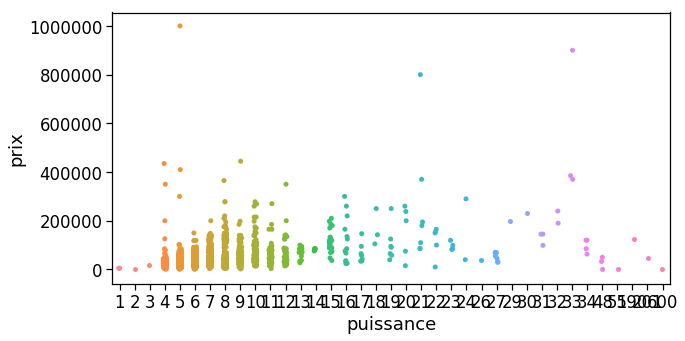

In [35]:
plt.figure(figsize=(10, 5))
sb.stripplot(x="puissance", y="prix", data=df);

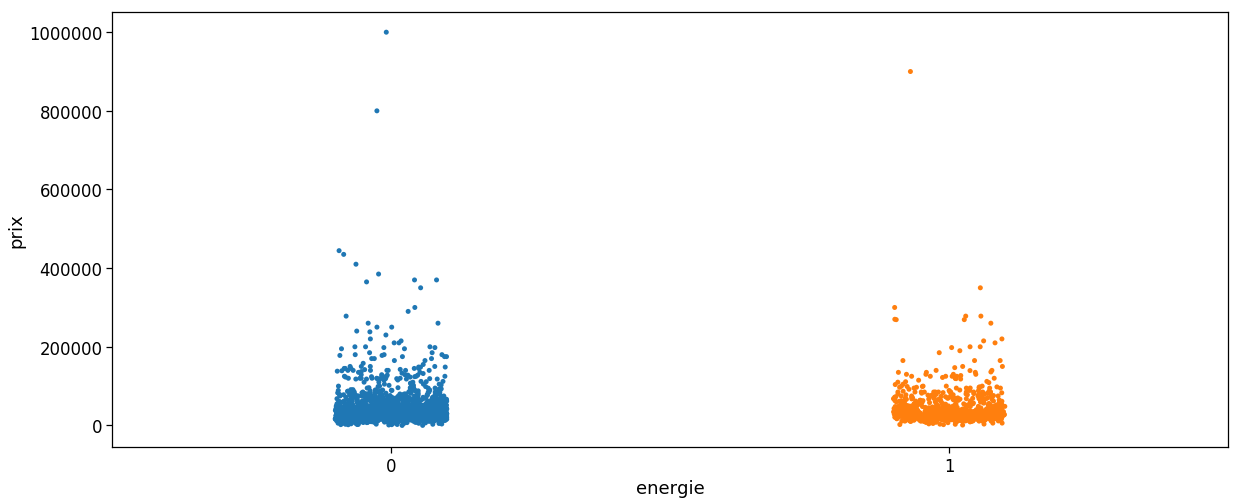

In [36]:
plt.figure(figsize=(20, 8))
sb.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sb.stripplot(x="energie", y="prix", data=df);

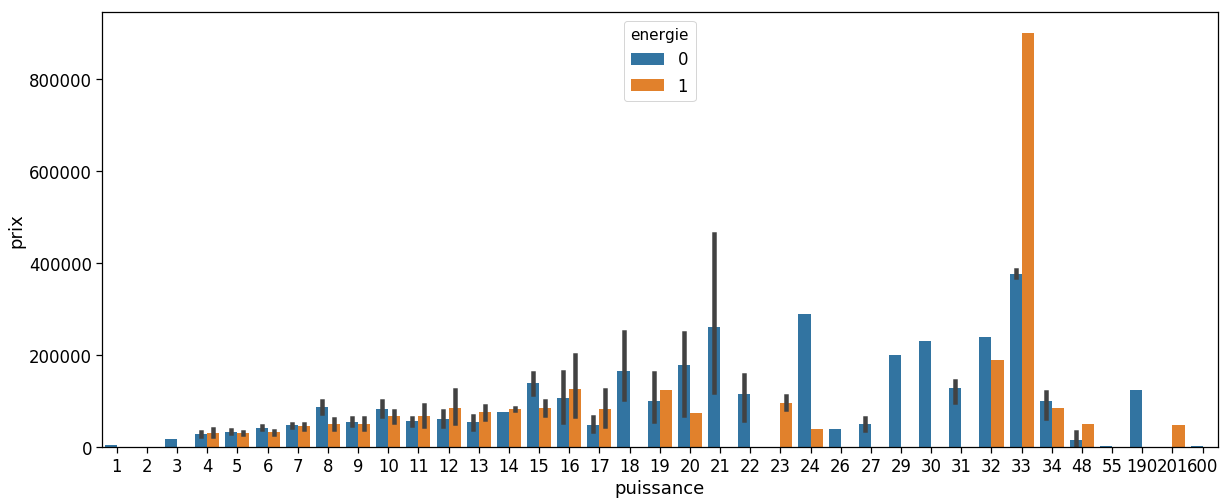

In [37]:
plt.figure(figsize=(20, 8))
sb.barplot(x="puissance", y="prix", hue="energie", data=df);

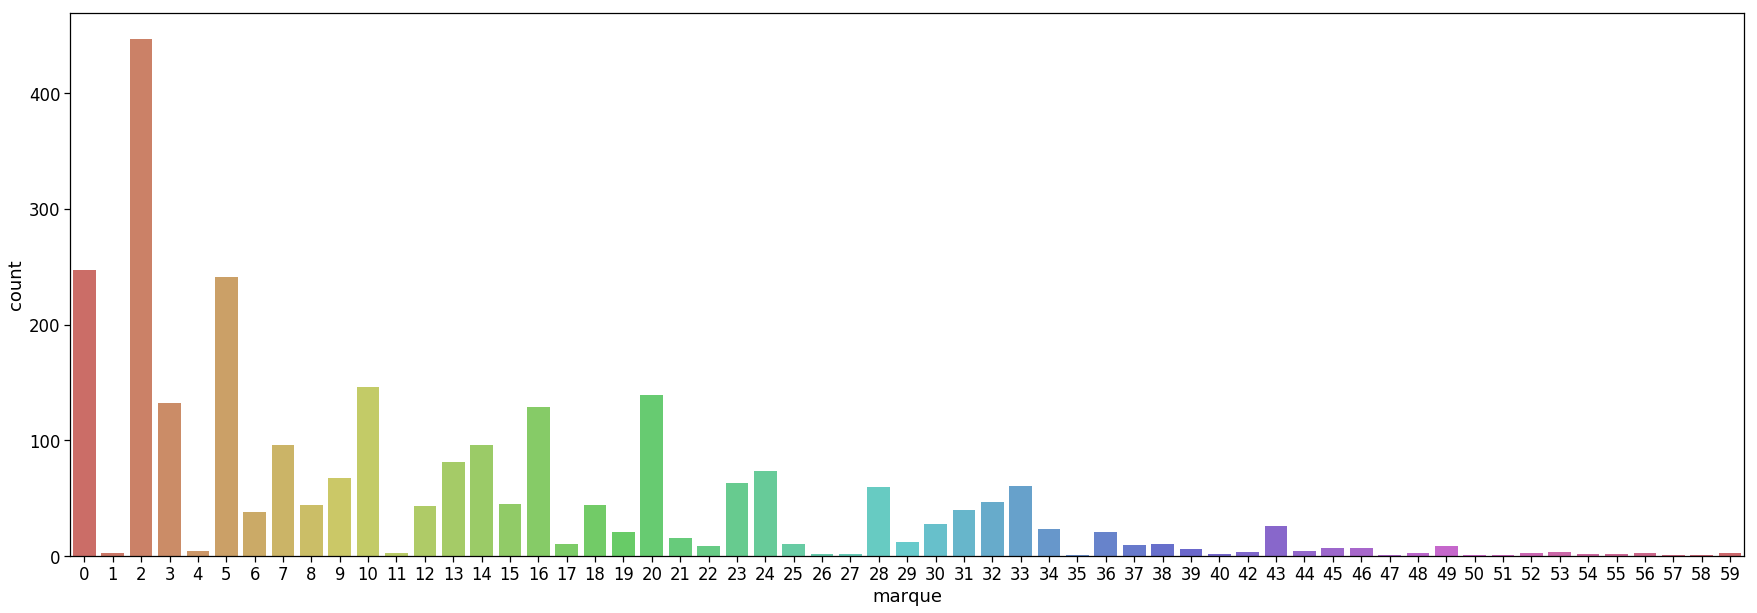

In [38]:
plt.figure(figsize=(30, 10))
sb.countplot(x='marque',data=df, palette='hls')

# Training, Testing

In [39]:

columns = ['marque', 'modele', 'kilometrage', 'annee', 'energie', 'boite', 'puissance']
labels = df['prix'].values
features = df[list(columns)].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

print("terminee")

terminee


In [40]:

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

Accuracy = regr.score(X_train, y_train)
print ("training: " + str(Accuracy*100) + "%")

accuracy2 = regr.score(X_test, y_test)
print ("testing: " + str(accuracy2 * 100) + "%")

training: 6.980453112569462%
testing: 13.473088779014663%


# Testing accurancy

In [41]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

Accuracy = regr.score(X_train, y_train)
print (' train result ' + str(Accuracy*100) + '%')

accuracy2 = regr.score(X_test, y_test)
print (' test result ' + str(accuracy2*100) + '%')

 train result 6.980453112569462%
 test result 13.473088779014663%


# Estimation des prix

## les donnees

In [42]:
vehicule_data = [[0,0,213,2008,0,0,9], 
               [1,1,180,2009,1,0,6], 
               [2,2,44000,2017,0,1,5]]  

## les prix estimee

In [43]:
for i, prix in enumerate(regr.predict(vehicule_data)):
    print("estimation pour vehicule numero {} : {:,.2f}".format(i+1, prix) + " DT")

estimation pour vehicule numero 1 : 38,459.10 DT
estimation pour vehicule numero 2 : 45,967.32 DT
estimation pour vehicule numero 3 : 50,769.29 DT


## Exportation du modele

In [44]:
from sklearn.externals import joblib

In [45]:
joblib.dump(regr, 'my_model.pkl', compress=9)

['my_model.pkl']

## Importation du modele


In [46]:
#from sklearn.externals import joblib
#model_clone = joblib.load('my_model.pkl')